In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    int64  
 15  resolution_height  893 non-null    int64  
 16  OS                 893 non

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,Mac OS,1


In [5]:
df["Ram_type"].value_counts()

,count
Ram_type,
DDR4,499
DDR5,166
LPDDR5,145
LPDDR4X,41
LPDDR4,14
LPDDR4x,13
Unified,7
DDR3,3
LPDDR5X,2


In [6]:
df["Ram_type"] = df["Ram_type"].str.upper().str.strip()
def categorize_ram(ram):
    if "LPDDR5X" in ram or "LPDDR5x" in ram:
        return "LPDDR5X"
    elif "LPDDR5" in ram:
        return "LPDDR5"
    elif "LPDDR4X" in ram or "LPDDR4x" in ram:
        return "LPDDR4X"
    elif "LPDDR4" in ram:
        return "LPDDR4"
    elif "DDR5" in ram:
        return "DDR5"
    elif "DDR4" in ram:
        return "DDR4"
    elif "DDR3" in ram:
        return "DDR3"
    else:
        return "OTHERS"
df["Ram_type"] = df["Ram_type"].apply(categorize_ram)
print(df["Ram_type"].value_counts())

Ram_type
DDR4       500
DDR5       166
LPDDR5     145
LPDDR4X     54
LPDDR4      14
OTHERS       8
LPDDR5X      3
DDR3         3
Name: count, dtype: int64


In [7]:
df["Ram_type"].value_counts()

,count
Ram_type,
DDR4,500
DDR5,166
LPDDR5,145
LPDDR4X,54
LPDDR4,14
OTHERS,8
LPDDR5X,3
DDR3,3


In [8]:
df["OS"] = df["OS"].str.strip().str.lower().str.replace(r"\s+", " ", regex=True)
df["OS"].value_counts()

,count
OS,
windows 11 os,797
windows 10 os,38
dos os,18
mac os,12
chrome os,10
windows os,9
ubuntu os,2
dos 3.0 os,2
mac 10.15.3 os,2


In [9]:
df["OS"] = df["OS"].replace(
    ["mac 10.15.3 os", "mac catalina os", "mac high sierra os"], "mac os"
)
df["OS"].value_counts()

,count
OS,
windows 11 os,797
windows 10 os,38
dos os,18
mac os,16
chrome os,10
windows os,9
ubuntu os,2
dos 3.0 os,2
android 11 os,1


In [10]:
median_price = df["price"].median()
df.loc[(df["OS"] == "windows os") & (df["price"] > median_price), "OS"] = "windows 11 os"
df.loc[(df["OS"] == "windows os") & (df["price"] <= median_price), "OS"] = "windows 10 os"

In [11]:
os_counts = df["OS"].value_counts()
df = df[df["OS"].isin(os_counts[os_counts >= 10].index)]

In [12]:
df["OS"].value_counts()

,count
OS,
windows 11 os,798
windows 10 os,46
dos os,18
mac os,16
chrome os,10


<ipython-input-13-552f035b0c7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=os_price_avg.index, y=os_price_avg.values, palette="viridis")


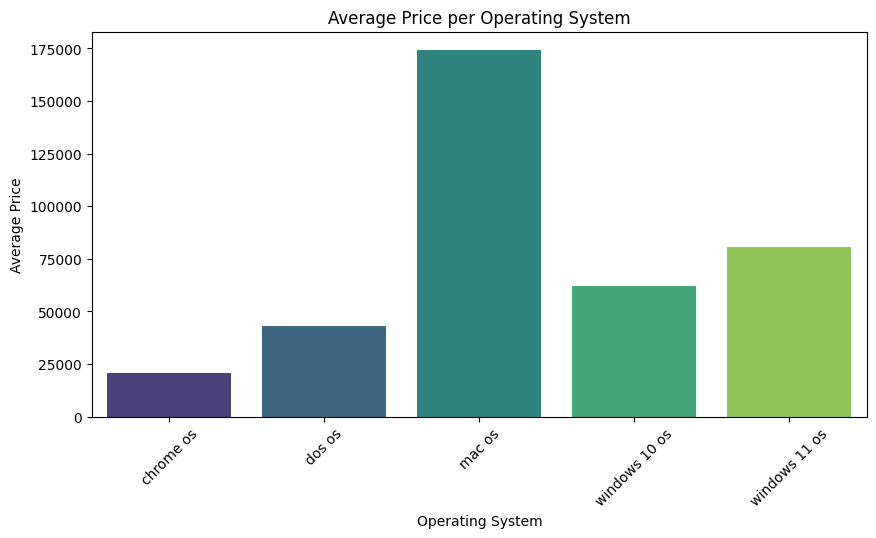

In [13]:
os_price_avg = df.groupby("OS")["price"].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x=os_price_avg.index, y=os_price_avg.values, palette="viridis")
plt.xlabel("Operating System")
plt.ylabel("Average Price")
plt.title("Average Price per Operating System")
plt.xticks(rotation=45)
plt.show()

In [14]:
df["warranty"].value_counts()

,count
warranty,
1,814
2,59
3,9
0,6


<ipython-input-15-66625fa4cac3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=warranty_price_avg.index, y=warranty_price_avg.values, palette="coolwarm")


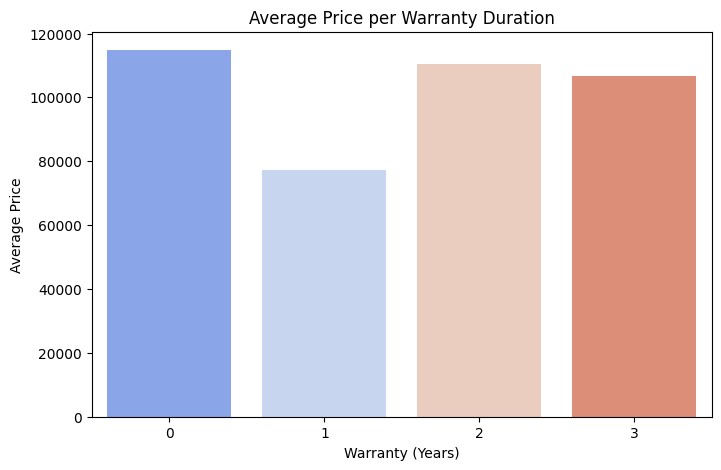

In [15]:
warranty_price_avg = df.groupby("warranty")["price"].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=warranty_price_avg.index, y=warranty_price_avg.values, palette="coolwarm")
plt.xlabel("Warranty (Years)")
plt.ylabel("Average Price")
plt.title("Average Price per Warranty Duration")
plt.xticks(rotation=0)
plt.show()

In [16]:
import pandas as pd
import scipy.stats as stats
df["price_category"] = pd.qcut(df["price"], q=3, labels=["Low", "Medium", "High"])
contingency_table = pd.crosstab(df["warranty"], df["price_category"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-Squared Statistic: {chi2:.4f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print("\nExpected Frequencies Table:\n", expected)

Chi-Squared Statistic: 25.4199
P-Value: 0.0003
Degrees of Freedom: 6

Expected Frequencies Table:
 [[  2.           2.05405405   1.94594595]
 [271.33333333 278.66666667 264.        ]
 [ 19.66666667  20.1981982   19.13513514]
 [  3.           3.08108108   2.91891892]]


In [17]:
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,price_category
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,windows 11 os,1,Low
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,windows 11 os,1,Low
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,windows 11 os,1,Low
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,windows 11 os,1,Medium
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,mac os,1,Medium


In [18]:
df.isna().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
brand,0
name,0
price,0
spec_rating,0
processor,0
CPU,0
Ram,0
Ram_type,0


In [19]:
df.duplicated().sum()

0

In [20]:
 df.drop(columns=["Unnamed: 0", "Unnamed: 0.1","name"], errors="ignore",inplace=True)

In [21]:
df.dtypes

,0
brand,object
price,int64
spec_rating,float64
processor,object
CPU,object
Ram,object
Ram_type,object
ROM,object
ROM_type,object
GPU,object


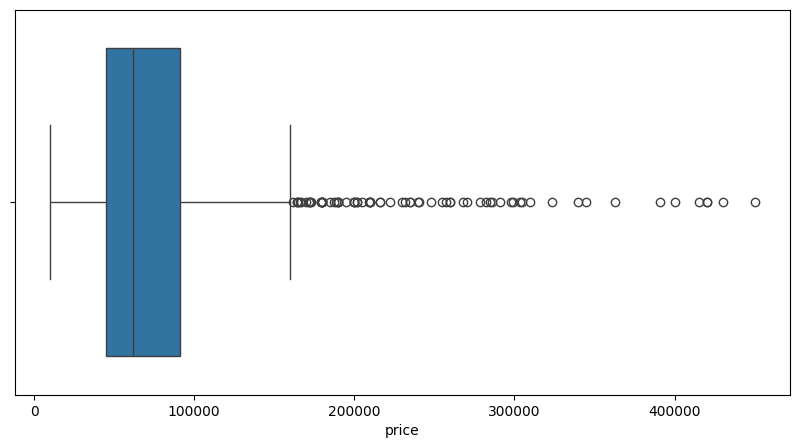

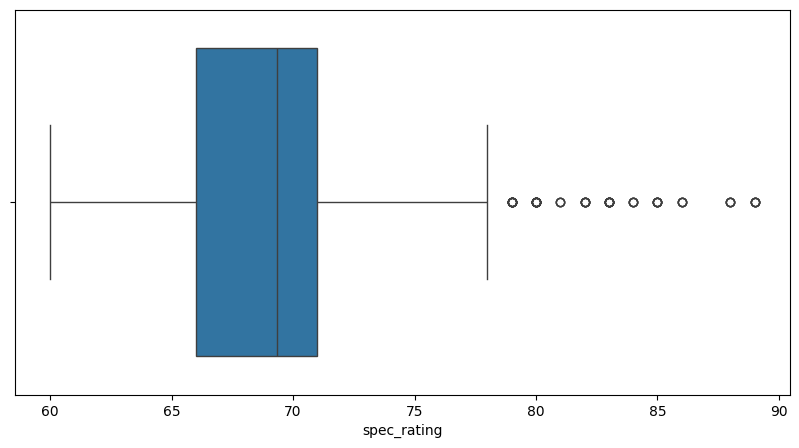

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["price"])
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["spec_rating"])
plt.show()

In [23]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

In [24]:
Q1 = df["spec_rating"].quantile(0.25)
Q3 = df["spec_rating"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["spec_rating"] >= lower_bound) & (df["spec_rating"] <= upper_bound)]

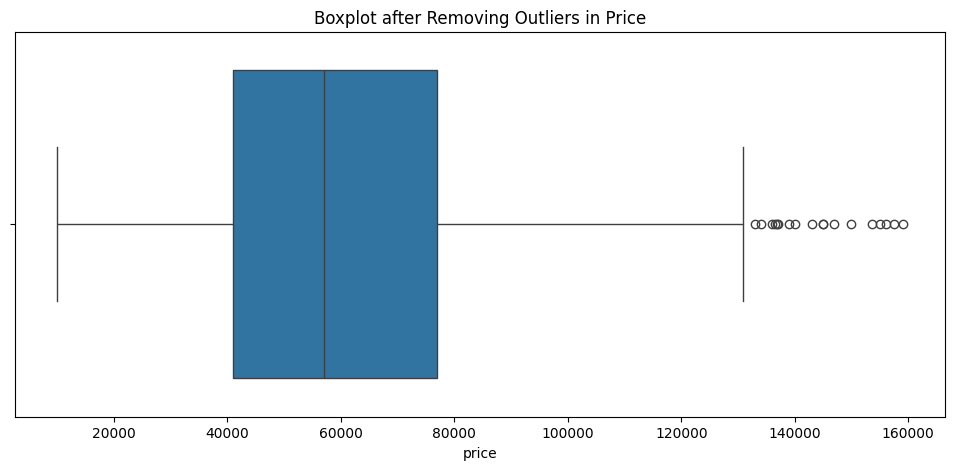

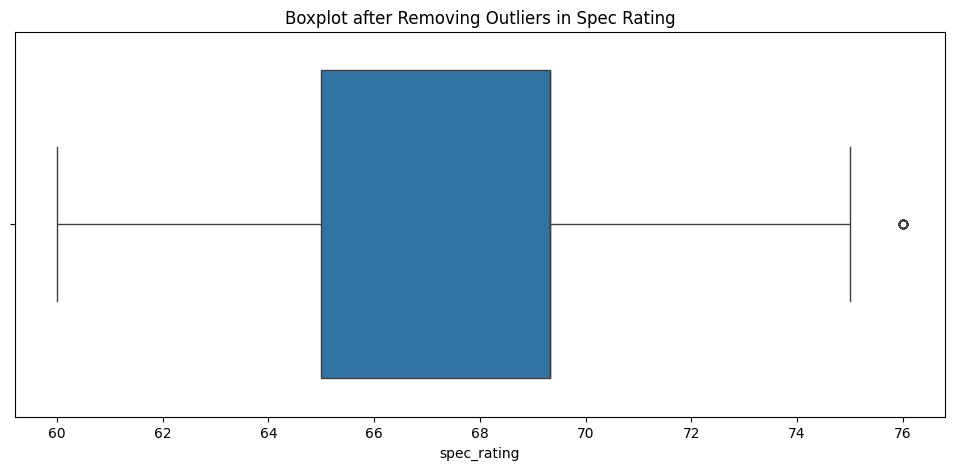

In [25]:
df_cleaned=df.copy()
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_cleaned["price"])
plt.title("Boxplot after Removing Outliers in Price")
plt.show()
plt.figure(figsize=(12, 5))
sns.boxplot(x=df_cleaned["spec_rating"])
plt.title("Boxplot after Removing Outliers in Spec Rating")
plt.show()

In [26]:
df["price"] = np.log1p(df["price"])
df["spec_rating"] = np.log1p(df["spec_rating"])

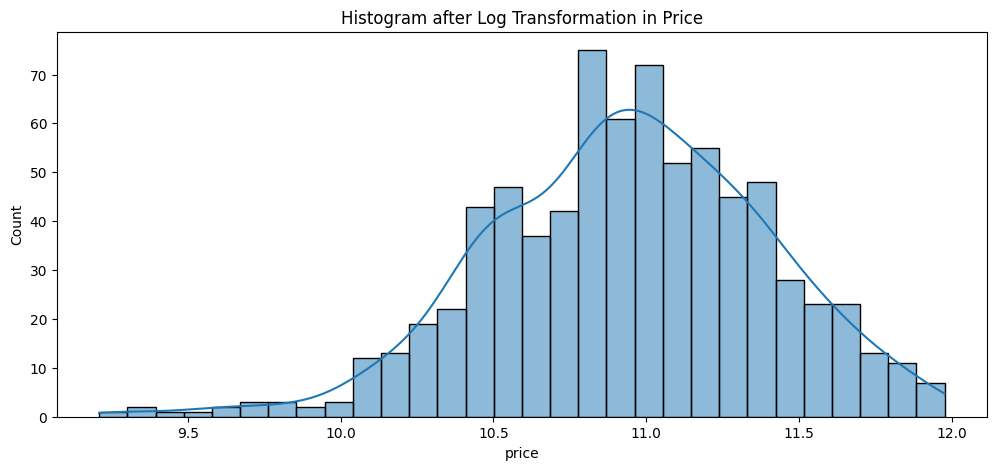

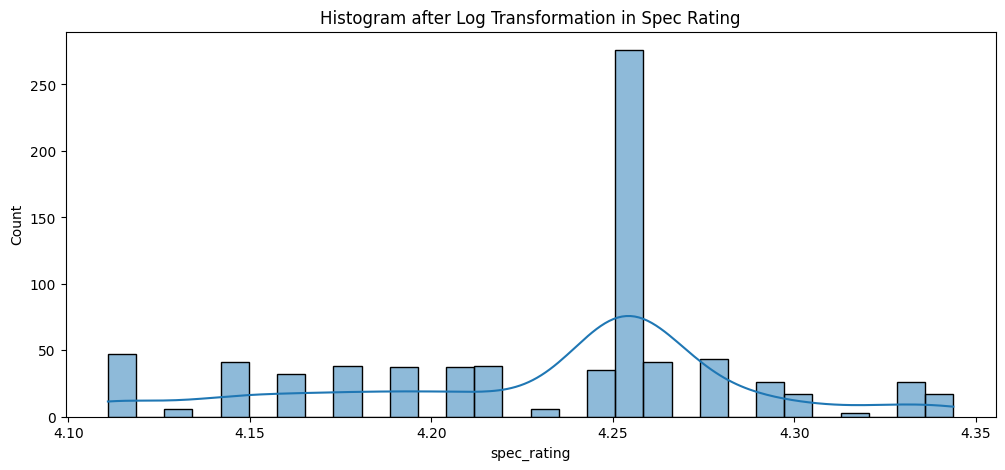

In [27]:
plt.figure(figsize=(12, 5))
sns.histplot(df["price"], kde=True, bins=30)
plt.title("Histogram after Log Transformation in Price")
plt.show()
plt.figure(figsize=(12, 5))
sns.histplot(df["spec_rating"], kde=True, bins=30)
plt.title("Histogram after Log Transformation in Spec Rating")
plt.show()

In [28]:
print(df["spec_rating"].value_counts())

spec_rating
4.253106    276
4.110874     47
4.276666     43
4.262680     41
4.143135     41
4.174387     38
4.219508     38
4.204693     37
4.189655     37
4.248495     35
4.158883     32
4.330733     26
4.290459     26
4.304065     17
4.343805     17
4.234107      6
4.127134      6
4.317488      3
Name: count, dtype: int64


In [29]:
df["CPU"] = df["CPU"].astype(str)
df["CPU_Cores"] = df["CPU"].str.extract(r'(\d+)\s*Cores?|\b(\d+)P\s*\+\s*(\d+)E\b').apply(
    lambda row: row[0] if pd.notna(row[0]) else (int(row[1]) + int(row[2]) if pd.notna(row[1]) and pd.notna(row[2]) else np.nan),
    axis=1
)
df["CPU_Cores"] = pd.to_numeric(df["CPU_Cores"], errors="coerce")
df["CPU_Threads"] = df["CPU"].str.extract(r'(\d+)\s*Threads')
df["CPU_Threads"] = pd.to_numeric(df["CPU_Threads"], errors="coerce")
df["CPU_Cores"].fillna(4, inplace=True)
df["CPU_Threads"].fillna(df["CPU_Cores"] * 2, inplace=True)
df.drop(columns=["CPU"], inplace=True, errors='ignore')
print(df[["CPU_Cores", "CPU_Threads", "OS"]].head())

   CPU_Cores  CPU_Threads             OS
0        4.0         12.0  windows 11 os
1        6.0          8.0  windows 11 os
2        4.0          4.0  windows 11 os
3       12.0         16.0  windows 11 os
4        8.0         16.0         mac os


<ipython-input-29-419dae3b449d>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CPU_Cores"].fillna(4, inplace=True)
<ipython-input-29-419dae3b449d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [30]:
df.head()

,brand,price,spec_rating,processor,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,price_category,CPU_Cores,CPU_Threads
0,HP,10.817796,4.304065,5th Gen AMD Ryzen 5 5600H,8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920,1080,windows 11 os,1,Low,4.0,12.0
1,HP,10.594157,4.110874,12th Gen Intel Core i3 1215U,8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920,1080,windows 11 os,1,Low,6.0,8.0
2,Acer,10.203259,4.253106,11th Gen Intel Core i3 1115G4,8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920,1080,windows 11 os,1,Low,4.0,4.0
3,Lenovo,10.997590,4.204693,12th Gen Intel Core i5 1240P,16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240,1400,windows 11 os,1,Medium,12.0,16.0
4,Apple,11.156122,4.253106,Apple M1,8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560,1600,mac os,1,Medium,8.0,16.0


In [31]:
df["OS"].value_counts()

,count
OS,
windows 11 os,685
windows 10 os,45
dos os,18
chrome os,10
mac os,8


In [32]:
df["GPU"].head(30)

,GPU
0,4GB AMD Radeon RX 6500M
1,Intel UHD Graphics
2,Intel Iris Xe Graphics
3,Intel Integrated Iris Xe
4,Apple M1 Integrated Graphics
5,Intel Iris Xe Graphics
6,Intel UHD Graphics
7,6GB NVIDIA GeForce RTX 4050
8,Intel Iris Xe
9,Intel Iris Xe Graphics


In [33]:
import re
def classify_gpu_type(gpu_name):
    if pd.isna(gpu_name) or not isinstance(gpu_name, str):
        return "Unknown"
    integrated_keywords = ["Intel UHD", "Intel Iris", "Integrated", "AMD Radeon Graphics"]
    return "Integrated" if any(keyword in gpu_name for keyword in integrated_keywords) else "Dedicated"
def classify_gpu_brand(gpu_name):
    if pd.isna(gpu_name) or not isinstance(gpu_name, str):
        return "Unknown"
    if "Intel" in gpu_name:
        return "Intel"
    elif "NVIDIA" in gpu_name or "GeForce" in gpu_name:
        return "NVIDIA"
    elif "AMD" in gpu_name or "Radeon" in gpu_name:
        return "AMD"
    return "Other"
def extract_vram(gpu_name, gpu_type):
    if pd.isna(gpu_name) or not isinstance(gpu_name, str):
        return 0 if gpu_type == "Integrated" else 4
    match = re.search(r'(\d+)GB', gpu_name)
    return int(match.group(1)) if match else (0 if gpu_type == "Integrated" else 4)
df["GPU"] = df["GPU"].fillna("Unknown")
df["GPU_Type"] = df["GPU"].apply(classify_gpu_type)
df["GPU_Brand"] = df["GPU"].apply(classify_gpu_brand)
df["GPU_VRAM"] = df.apply(lambda row: extract_vram(row["GPU"], row["GPU_Type"]), axis=1)
df["GPU_Type"] = df["GPU_Type"].fillna("Unknown")
df["GPU_Brand"] = df["GPU_Brand"].fillna("Unknown")
df["GPU_VRAM"] = df["GPU_VRAM"].fillna(0).astype(int)
print(df.head())

    brand      price  spec_rating                      processor   Ram  \
0      HP  10.817796     4.304065      5th Gen AMD Ryzen 5 5600H   8GB   
1      HP  10.594157     4.110874   12th Gen Intel Core i3 1215U   8GB   
2    Acer  10.203259     4.253106  11th Gen Intel Core i3 1115G4   8GB   
3  Lenovo  10.997590     4.204693   12th Gen Intel Core i5 1240P  16GB   
4   Apple  11.156122     4.253106                       Apple M1   8GB   

  Ram_type    ROM ROM_type                           GPU  display_size  \
0     DDR4  512GB      SSD       4GB AMD Radeon RX 6500M          15.6   
1     DDR4  512GB      SSD            Intel UHD Graphics          15.6   
2     DDR4  512GB      SSD        Intel Iris Xe Graphics          14.0   
3   LPDDR5  512GB      SSD      Intel Integrated Iris Xe          14.0   
4     DDR4  256GB      SSD  Apple M1 Integrated Graphics          13.3   

   resolution_width  resolution_height             OS  warranty  \
0              1920               1080  win

In [34]:
df.drop(columns=["GPU"],inplace=True)

In [35]:
df.head(100)

,brand,price,spec_rating,processor,Ram,Ram_type,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,price_category,CPU_Cores,CPU_Threads,GPU_Type,GPU_Brand,GPU_VRAM
0,HP,10.817796,4.304065,5th Gen AMD Ryzen 5 5600H,8GB,DDR4,512GB,SSD,15.6,1920,1080,windows 11 os,1,Low,4.0,12.0,Dedicated,AMD,4
1,HP,10.594157,4.110874,12th Gen Intel Core i3 1215U,8GB,DDR4,512GB,SSD,15.6,1920,1080,windows 11 os,1,Low,6.0,8.0,Integrated,Intel,0
2,Acer,10.203259,4.253106,11th Gen Intel Core i3 1115G4,8GB,DDR4,512GB,SSD,14.0,1920,1080,windows 11 os,1,Low,4.0,4.0,Integrated,Intel,0
3,Lenovo,10.997590,4.204693,12th Gen Intel Core i5 1240P,16GB,LPDDR5,512GB,SSD,14.0,2240,1400,windows 11 os,1,Medium,12.0,16.0,Integrated,Intel,0
4,Apple,11.156122,4.253106,Apple M1,8GB,DDR4,256GB,SSD,13.3,2560,1600,mac os,1,Medium,8.0,16.0,Integrated,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,iBall,9.210340,4.253106,Intel Atom Quad Core Z3735F,2GB,DDR3,32GB,Hard-Disk,11.6,1366,768,windows 10 os,1,Low,4.0,8.0,Dedicated,Intel,4
106,Asus,10.621108,4.253106,12th Gen Intel Core i3 1220P,8GB,DDR4,512GB,SSD,15.6,1920,1080,windows 11 os,1,Low,10.0,12.0,Integrated,Intel,0
107,Lenovo,11.225123,4.219508,6th Gen AMD Ryzen 7 6800H,8GB,DDR4,512GB,SSD,15.6,1920,1080,windows 11 os,1,Medium,4.0,16.0,Dedicated,NVIDIA,4
108,Zebronics,10.433851,4.189655,12th Gen Intel Core i3 1215U,8GB,DDR4,512GB,SSD,15.6,1920,1080,windows 11 os,1,Low,6.0,8.0,Integrated,Intel,0


In [36]:
df["ROM_type"].value_counts()

,count
ROM_type,
SSD,747
Hard-Disk,19


In [37]:
df['processor'] = df['processor'].astype(str).str.strip()
print(df["processor"].unique())

['5th Gen AMD Ryzen 5 5600H' '12th Gen Intel Core i3 1215U'
 '11th Gen Intel Core i3 1115G4' '12th Gen Intel Core i5 1240P' 'Apple M1'
 '13th Gen Intel Core i5 13420H' '12th Gen Intel Core i5 12500H'
 '12th Gen Intel Core i7 1255U' 'Intel Celeron  N4020'
 '7th Gen AMD Ryzen 3 7320U' '11th Gen Intel Core i5 11400H'
 '13th Gen Intel Core i9 13900H' '12th Gen Intel Core i5 12450H'
 '11th Gen Intel Core i5 11300H' 'Apple M2'
 '11th Gen Intel Core i5 1135G7' '5th Gen AMD Ryzen 7  5800H'
 '5th Gen AMD Ryzen 5 5500U' '3rd Gen AMD Athlon 3050U'
 'Intel Core i3 N305' '13th Gen Intel Core i7 1355U'
 '6th Gen AMD Ryzen 5 6600H' '13th Gen Intel Core i5 1340P'
 '12th Gen Intel Core i5 1235U' '13th Gen Intel Core i5 13450HX'
 '5th Gen AMD Ryzen 3 5300U' '5th Gen AMD Ryzen 5 5625U'
 '11th Gen Intel Core i5 1155G7' '7th Gen AMD Ryzen 7 7730U'
 '11th Gen Intel Core i7 11800H' '12th Gen Intel Core i7 12700H'
 '13th Gen Intel Core i7 13620H' '13th Gen Intel Core i7 1360P'
 '12th Gen Intel Core i7 12650H'

In [38]:
from sklearn.preprocessing import OrdinalEncoder
processor_order = df['processor'].unique().tolist()
desired_order = [
    "3rd Gen AMD Ryzen 5 3500U",
    "5th Gen AMD Ryzen 5 5625U",
    "5th Gen AMD Ryzen 7 5825U",
    "11th Gen Intel Core i3 1115G4",
    "12th Gen Intel Core i3 1215U",
    "12th Gen Intel Core i5 1235U",
    "13th Gen Intel Core i5 1335U",
]
for processor in processor_order:
    if processor not in desired_order:
        desired_order.append(processor)
encoder = OrdinalEncoder(categories=[desired_order], handle_unknown='use_encoded_value', unknown_value=-1)
df[["processor"]] = encoder.fit_transform(df[["processor"]])

In [39]:
print(df[['processor']].head(20))

    processor
0         7.0
1         4.0
2         3.0
3         8.0
4         9.0
5         8.0
6         4.0
7        10.0
8        11.0
9         8.0
10       12.0
11       13.0
12       11.0
14       14.0
15       15.0
16        3.0
17       16.0
18       17.0
19       18.0
20        7.0


In [40]:
label_encoders = {}
label_columns = ["brand", "OS", "GPU_Brand", "ROM_type"]
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
ordinal_columns = ["GPU_Type", "Ram_type","price_category"]
ordinal_encoder = OrdinalEncoder()
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])
print(df.head())

   brand      price  spec_rating  processor   Ram  Ram_type    ROM  ROM_type  \
0      9  10.817796     4.304065        7.0   8GB       1.0  512GB         1   
1      9  10.594157     4.110874        4.0   8GB       1.0  512GB         1   
2      1  10.203259     4.253106        3.0   8GB       1.0  512GB         1   
3     14  10.997590     4.204693        8.0  16GB       5.0  512GB         1   
4      2  11.156122     4.253106        9.0   8GB       1.0  256GB         1   

   display_size  resolution_width  resolution_height  OS  warranty  \
0          15.6              1920               1080   4         1   
1          15.6              1920               1080   4         1   
2          14.0              1920               1080   4         1   
3          14.0              2240               1400   4         1   
4          13.3              2560               1600   2         1   

   price_category  CPU_Cores  CPU_Threads  GPU_Type  GPU_Brand  GPU_VRAM  
0             1.0      

In [41]:
df.drop(columns=["Ram", "ROM"], inplace=True)
df.reset_index(drop=True, inplace=True)

In [42]:
df.head(20)

,brand,price,spec_rating,processor,Ram_type,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,price_category,CPU_Cores,CPU_Threads,GPU_Type,GPU_Brand,GPU_VRAM
0,9,10.817796,4.304065,7.0,1.0,1,15.6,1920,1080,4,1,1.0,4.0,12.0,0.0,0,4
1,9,10.594157,4.110874,4.0,1.0,1,15.6,1920,1080,4,1,1.0,6.0,8.0,1.0,1,0
2,1,10.203259,4.253106,3.0,1.0,1,14.0,1920,1080,4,1,1.0,4.0,4.0,1.0,1,0
3,14,10.997590,4.204693,8.0,5.0,1,14.0,2240,1400,4,1,2.0,12.0,16.0,1.0,1,0
4,2,11.156122,4.253106,9.0,1.0,1,13.3,2560,1600,2,1,2.0,8.0,16.0,1.0,3,0
5,1,10.596410,4.143135,8.0,1.0,1,14.0,1920,1080,4,1,1.0,12.0,16.0,1.0,1,0
6,6,10.513009,4.110874,4.0,1.0,1,15.6,1920,1080,4,1,1.0,6.0,8.0,1.0,1,0
7,1,11.251444,4.158883,10.0,2.0,1,15.6,1920,1080,4,1,2.0,8.0,12.0,0.0,2,6
8,3,10.799392,4.174387,11.0,1.0,1,15.6,1920,1080,4,1,1.0,12.0,16.0,1.0,1,0
9,19,11.225123,4.234107,8.0,5.0,1,13.3,1080,1920,4,1,2.0,12.0,16.0,1.0,1,0


In [43]:
print(df["processor"].unique())

[  7.   4.   3.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.
  19.  20.  21.  22.  23.  24.  25.  26.  27.   5.  28.  29.   1.  30.
  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.
  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.   6.  57.
  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.  71.
  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.  85.
  86.  87.  88.  89.  90.  91.  92.  93.  94.   0.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124.   2. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137.]


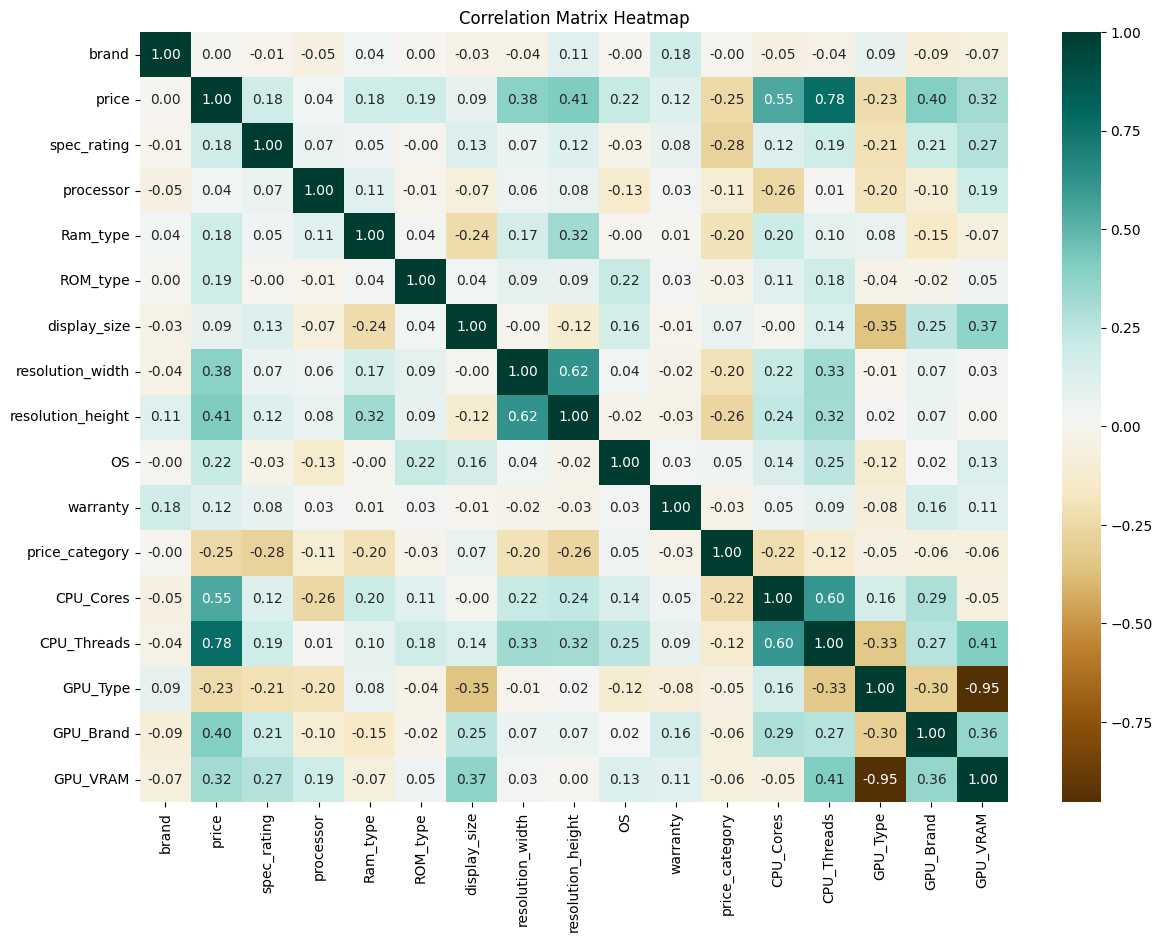

In [44]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap="BrBG", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

In [45]:
df.cov()

,brand,price,spec_rating,processor,Ram_type,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,price_category,CPU_Cores,CPU_Threads,GPU_Type,GPU_Brand,GPU_VRAM
brand,32.931129,0.006749,-0.003405,-9.241240,0.401553,0.004396,-0.171799,-80.346081,170.109538,-0.001771,0.326006,-0.002758,-0.932572,-0.944521,0.246492,-0.364822,-0.866527
price,0.006749,0.206512,0.004614,0.639373,0.133459,0.013458,0.036818,58.055977,49.817571,0.068270,0.017066,-0.084973,0.824354,1.597691,-0.052668,0.133869,0.329310
spec_rating,-0.003405,0.004614,0.003135,0.125448,0.004396,-0.000006,0.006375,1.222479,1.725187,-0.001142,0.001362,-0.012033,0.021916,0.047836,-0.005710,0.008443,0.034736
processor,-9.241240,0.639373,0.125448,1061.051581,5.838786,-0.057366,-2.013705,619.878844,655.645564,-2.969122,0.347791,-2.642233,-28.023881,1.706507,-3.161754,-2.477575,14.078513
Ram_type,0.401553,0.133459,0.004396,5.838786,2.561062,0.009043,-0.339704,89.138757,135.913043,-0.000671,0.003316,-0.242700,1.078757,0.694725,0.060052,-0.176148,-0.238086
ROM_type,0.004396,0.013458,-0.000006,-0.057366,0.009043,0.024221,0.005881,4.771672,3.738842,0.023732,0.001654,-0.003369,0.057102,0.126627,-0.002857,-0.002073,0.018321
display_size,-0.171799,0.036818,0.006375,-2.013705,-0.339704,0.005881,0.813724,-0.068582,-27.907531,0.101103,-0.004172,0.048480,-0.014059,0.561637,-0.157163,0.162750,0.757663
resolution_width,-80.346081,58.055977,1.222479,619.878844,89.138757,4.771672,-0.068582,110929.416215,54622.643253,10.308565,-1.950518,-51.614819,242.139873,491.391034,-1.662431,16.304592,26.207246
resolution_height,170.109538,49.817571,1.725187,655.645564,135.913043,3.738842,-27.907531,54622.643253,69898.772853,-3.148456,-2.846021,-52.835332,207.673558,377.509364,1.982983,12.783474,0.628079
OS,-0.001771,0.068270,-0.001142,-2.969122,-0.000671,0.023732,0.101103,10.308565,-3.148456,0.480570,0.006954,0.024738,0.323277,0.777211,-0.041537,0.012463,0.206290


In [46]:
df["resolution_area"] = df["resolution_width"] * df["resolution_height"]
df = df.drop(columns=["CPU_Cores", "GPU_Brand", "resolution_width", "resolution_height"])
df.head()

,brand,price,spec_rating,processor,Ram_type,ROM_type,display_size,OS,warranty,price_category,CPU_Threads,GPU_Type,GPU_VRAM,resolution_area
0,9,10.817796,4.304065,7.0,1.0,1,15.6,4,1,1.0,12.0,0.0,4,2073600
1,9,10.594157,4.110874,4.0,1.0,1,15.6,4,1,1.0,8.0,1.0,0,2073600
2,1,10.203259,4.253106,3.0,1.0,1,14.0,4,1,1.0,4.0,1.0,0,2073600
3,14,10.997590,4.204693,8.0,5.0,1,14.0,4,1,2.0,16.0,1.0,0,3136000
4,2,11.156122,4.253106,9.0,1.0,1,13.3,2,1,2.0,16.0,1.0,0,4096000


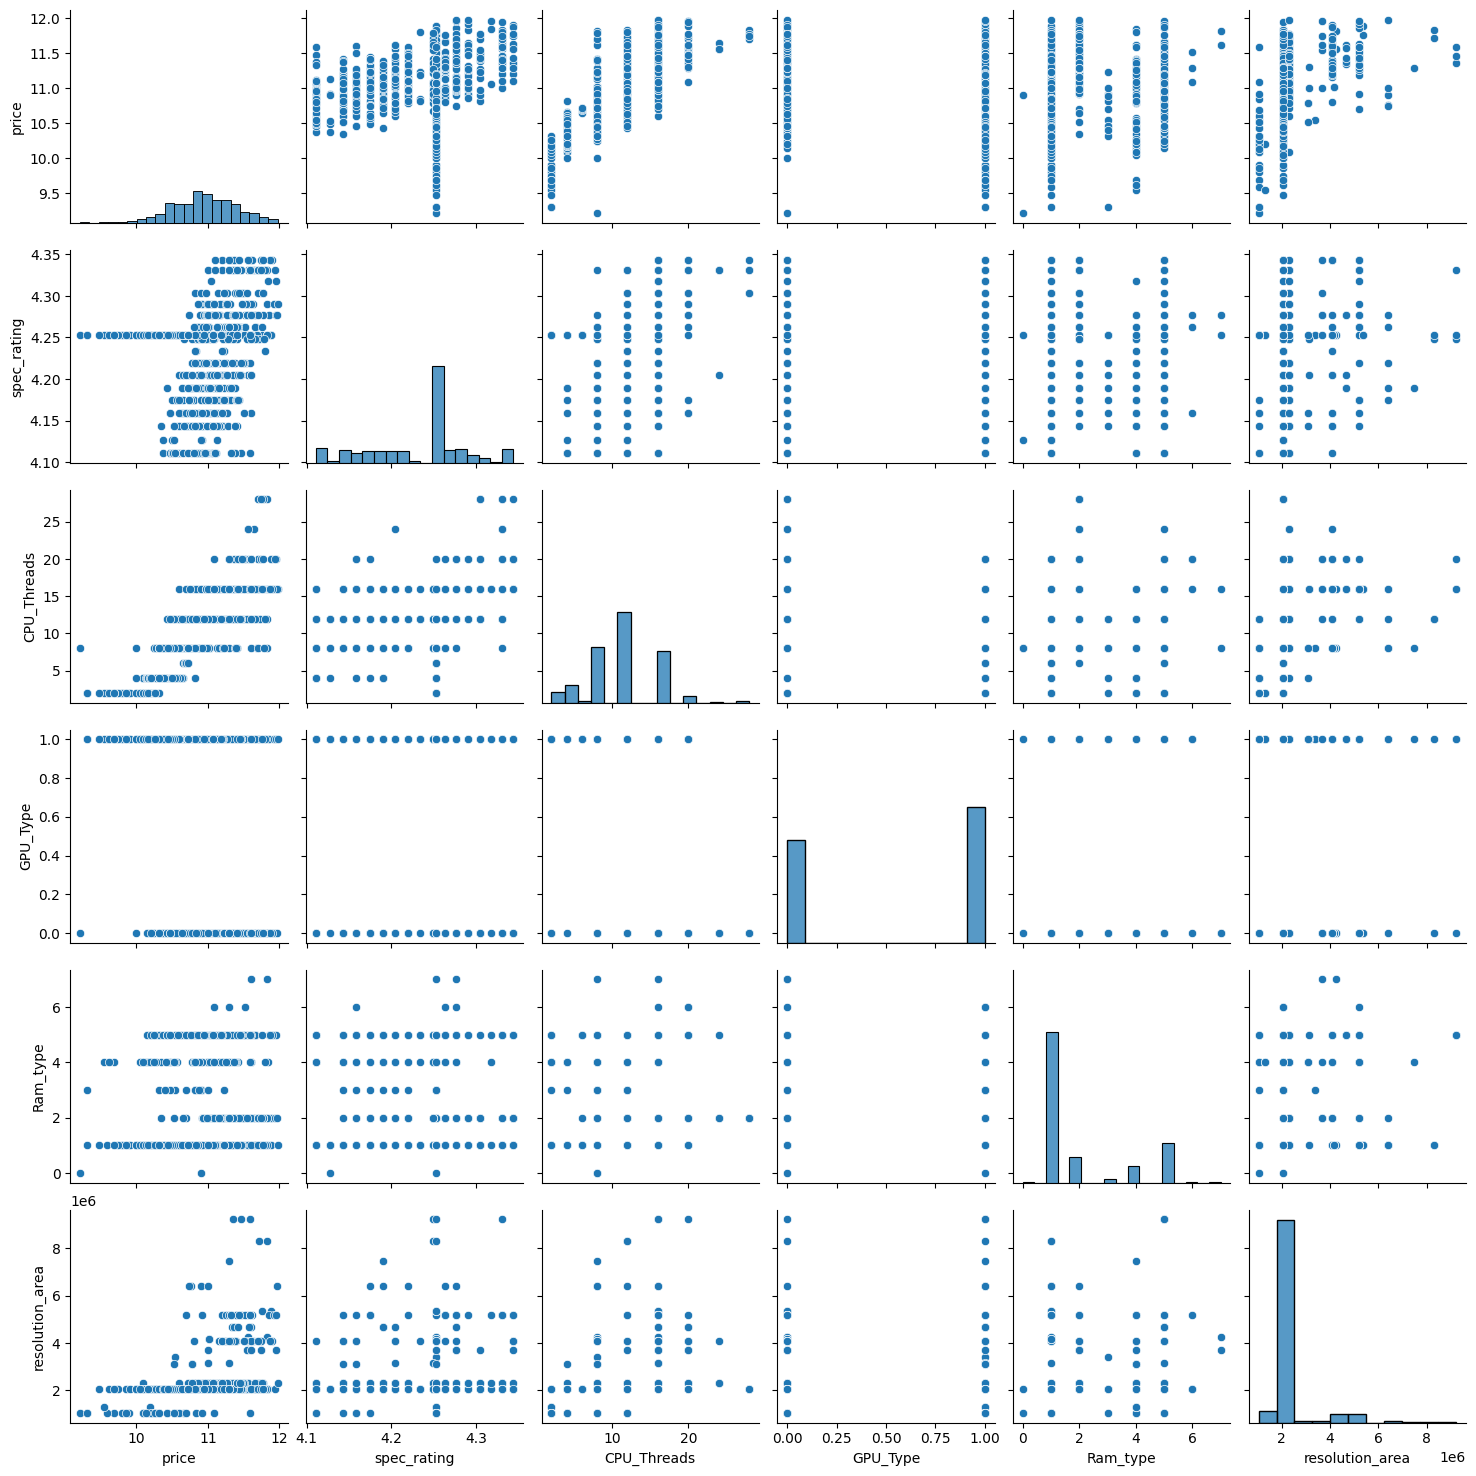

In [47]:
sns.pairplot(df[["price", "spec_rating", "CPU_Threads", "GPU_Type", "Ram_type", "resolution_area"]])
plt.show()

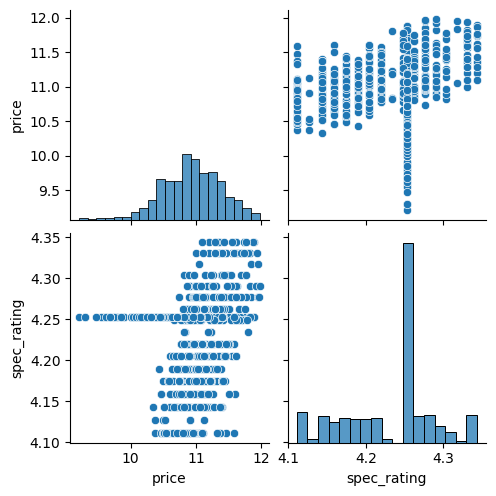

In [48]:
sns.pairplot(df[['price', 'spec_rating']])
plt.show()

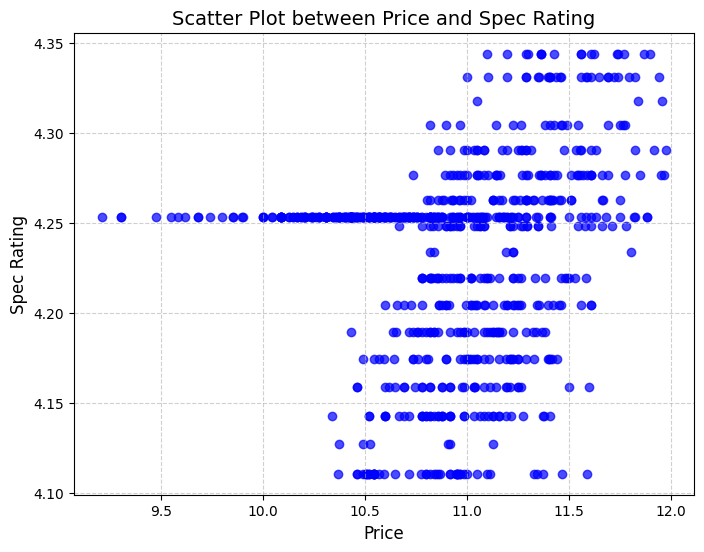

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df['spec_rating'], alpha=0.7, color='blue')
plt.title('Scatter Plot between Price and Spec Rating', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Spec Rating', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

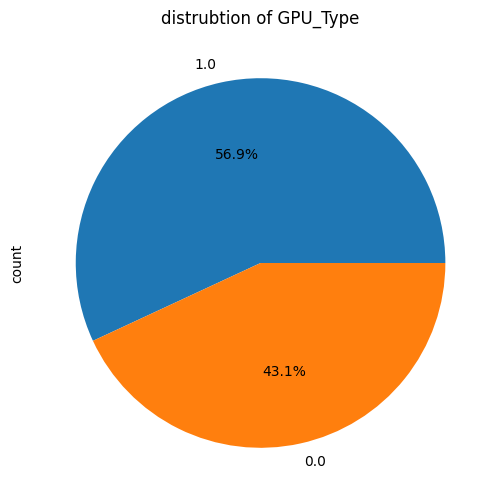

In [50]:
df["GPU_Type"].value_counts().plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("distrubtion of GPU_Type")
plt.show()

<Figure size 1500x1000 with 0 Axes>

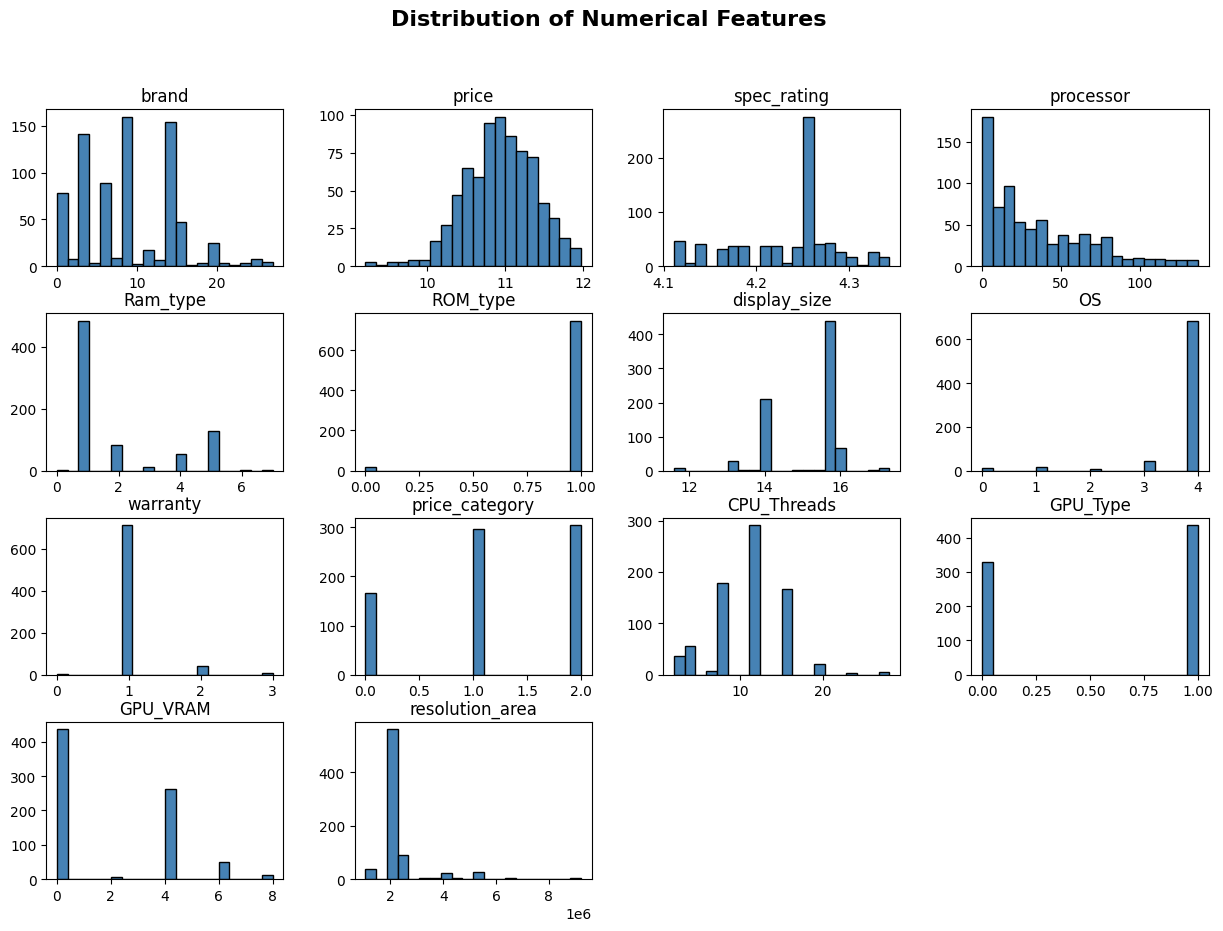

In [51]:
plt.figure(figsize=(15, 10))
df.hist(figsize=(15, 10), bins=20, color='steelblue', edgecolor='black', grid=False)
plt.suptitle("Distribution of Numerical Features", fontsize=16, fontweight='bold')
plt.show()

In [52]:
central_tendency = {
    'price': {
        'mean': df['price'].mean(),
        'median': df['price'].median(),
        'mode': df['price'].mode()[0]
    },
    'spec_rating': {
        'mean': df['spec_rating'].mean(),
        'median': df['spec_rating'].median(),
        'mode': df['spec_rating'].mode()[0]
    }
}
spread = {
    'price': {
        'range': df['price'].max() - df['price'].min(),
        'variance': df['price'].var(),
        'std_dev': df['price'].std(),
        'iqr': df['price'].quantile(0.75) - df['price'].quantile(0.25)
    },
    'spec_rating': {
        'range': df['spec_rating'].max() - df['spec_rating'].min(),
        'variance': df['spec_rating'].var(),
        'std_dev': df['spec_rating'].std(),
        'iqr': df['spec_rating'].quantile(0.75) - df['spec_rating'].quantile(0.25)
    }
}
for key, values in central_tendency.items():
    print(f"\n{key.capitalize()}:")
    for metric, value in values.items():
        print(f"  {metric.capitalize()}: {value}")


Price:
  Mean: 10.937806235343261
  Median: 10.950648639613158
  Mode: 10.819598268208338

Spec_rating:
  Mean: 4.231369015676567
  Median: 4.253106442817069
  Mode: 4.253106442817069


In [53]:
spread = {
    'price': {
        'range': df['price'].max() - df['price'].min(),
        'variance': df['price'].var(),
        'std_dev': df['price'].std(),
        'iqr': df['price'].quantile(0.75) - df['price'].quantile(0.25)
    },
    'spec_rating': {
        'range': df['spec_rating'].max() - df['spec_rating'].min(),
        'variance': df['spec_rating'].var(),
        'std_dev': df['spec_rating'].std(),
        'iqr': df['spec_rating'].quantile(0.75) - df['spec_rating'].quantile(0.25)
    }
}
for key, values in spread.items():
    print(f"\n{key.capitalize()}:")
    for metric, value in values.items():
        print(f"  {metric.capitalize()}: {value}")


Price:
  Range: 2.7663253985145833
  Variance: 0.20651213280663133
  Std_dev: 0.4544360601961857
  Iqr: 0.6303360014925801

Spec_rating:
  Range: 0.23293155768037277
  Variance: 0.0031346409702464667
  Std_dev: 0.05598786449085611
  Iqr: 0.06345170079064388


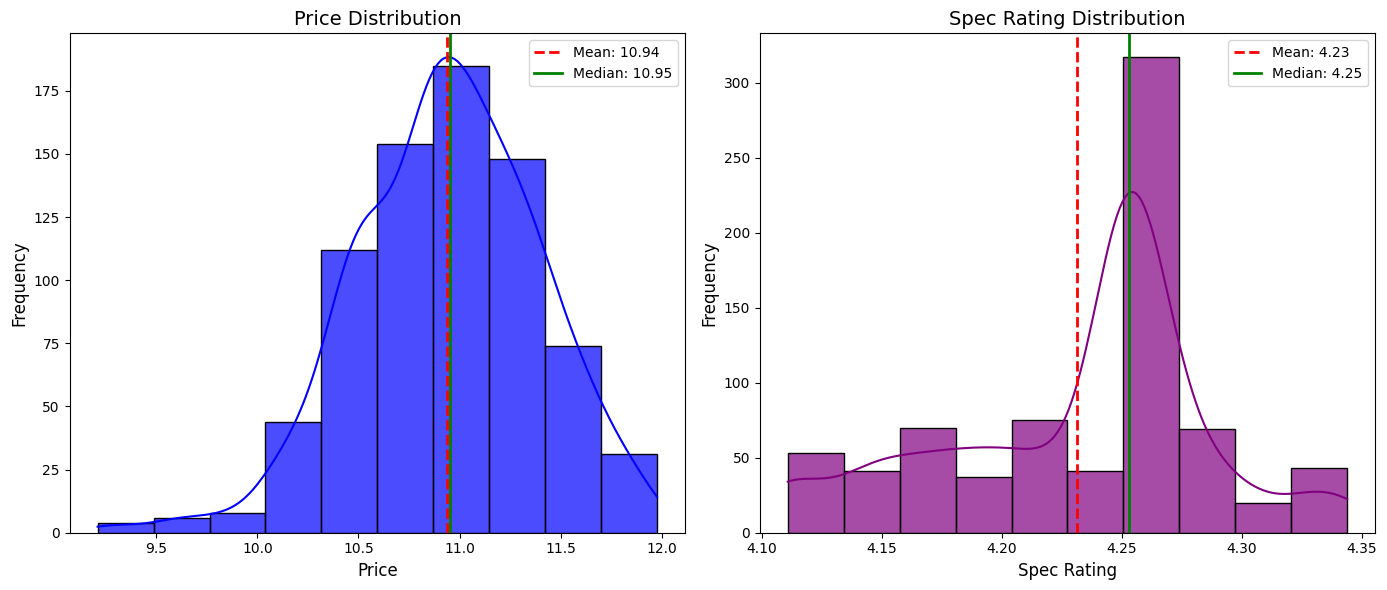

In [54]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x="price", bins=10, kde=True, color="blue", alpha=0.7)
plt.axvline(df['price'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['price'].mean():.2f}")
plt.axvline(df['price'].median(), color='green', linestyle='-', linewidth=2, label=f"Median: {df['price'].median():.2f}")
plt.title("Price Distribution", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.subplot(1, 2, 2)
sns.histplot(data=df, x="spec_rating", bins=10, kde=True, color="purple", alpha=0.7)
plt.axvline(df['spec_rating'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df['spec_rating'].mean():.2f}")
plt.axvline(df['spec_rating'].median(), color='green', linestyle='-', linewidth=2, label=f"Median: {df['spec_rating'].median():.2f}")
plt.title("Spec Rating Distribution", fontsize=14)
plt.xlabel("Spec Rating", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.tight_layout()
plt.show()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[df.columns] = scaler.fit_transform(df)
print(df_minmax.head())

      brand     price  spec_rating  processor  Ram_type  ROM_type  \
0  0.333333  0.581080     0.829391   0.051095  0.142857       1.0   
1  0.333333  0.500236     0.000000   0.029197  0.142857       1.0   
2  0.037037  0.358930     0.610620   0.021898  0.142857       1.0   
3  0.518519  0.646073     0.402774   0.058394  0.714286       1.0   
4  0.074074  0.703381     0.610620   0.065693  0.142857       1.0   

   display_size   OS  warranty  price_category  CPU_Threads  GPU_Type  \
0      0.701754  1.0  0.333333             0.5     0.384615       0.0   
1      0.701754  1.0  0.333333             0.5     0.230769       1.0   
2      0.421053  1.0  0.333333             0.5     0.076923       1.0   
3      0.421053  1.0  0.333333             1.0     0.538462       1.0   
4      0.298246  0.5  0.333333             1.0     0.538462       1.0   

   GPU_VRAM  resolution_area  
0       0.5         0.125447  
1       0.0         0.125447  
2       0.0         0.125447  
3       0.0         0.

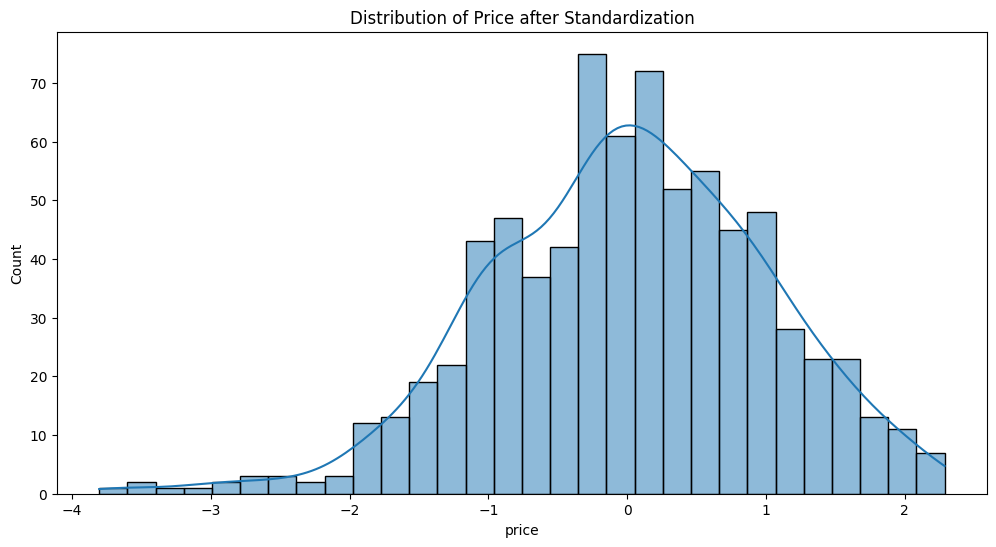

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standard = df.copy()
df_standard[df.columns] = scaler.fit_transform(df)
plt.figure(figsize=(12,6))
sns.histplot(df_standard['price'], kde=True, bins=30)
plt.title('Distribution of Price after Standardization')
plt.show()

In [57]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df_robust = df.copy()
df_robust[df.columns] = scaler.fit_transform(df)
print(df_robust.head())

      brand     price  spec_rating  processor  Ram_type  ROM_type  \
0  0.000000 -0.210764     0.803109      -0.36       0.0       0.0   
1  0.000000 -0.565559    -2.241588      -0.42       0.0       0.0   
2 -0.727273 -1.185701     0.000000      -0.44       0.0       0.0   
3  0.454545  0.074470    -0.763003      -0.34       2.0       0.0   
4 -0.636364  0.325974     0.000000      -0.32       0.0       0.0   

   display_size   OS  warranty  price_category  CPU_Threads  GPU_Type  \
0        0.0000  0.0       0.0             0.0          0.0      -1.0   
1        0.0000  0.0       0.0             0.0         -0.5       0.0   
2       -1.0000  0.0       0.0             0.0         -1.0       0.0   
3       -1.0000  0.0       0.0             1.0          0.5       0.0   
4       -1.4375 -2.0       0.0             1.0          0.5       0.0   

   GPU_VRAM  resolution_area  
0       1.0              0.0  
1       0.0              0.0  
2       0.0              0.0  
3       0.0        106

In [58]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
df_maxabs = df.copy()
df_maxabs[df.columns] = scaler.fit_transform(df)
print(df_maxabs.head())

      brand     price  spec_rating  processor  Ram_type  ROM_type  \
0  0.333333  0.903239     0.990851   0.051095  0.142857       1.0   
1  0.333333  0.884566     0.946376   0.029197  0.142857       1.0   
2  0.037037  0.851928     0.979120   0.021898  0.142857       1.0   
3  0.518519  0.918251     0.967974   0.058394  0.714286       1.0   
4  0.074074  0.931488     0.979120   0.065693  0.142857       1.0   

   display_size   OS  warranty  price_category  CPU_Threads  GPU_Type  \
0      0.901734  1.0  0.333333             0.5     0.428571       0.0   
1      0.901734  1.0  0.333333             0.5     0.285714       1.0   
2      0.809249  1.0  0.333333             0.5     0.142857       1.0   
3      0.809249  1.0  0.333333             1.0     0.571429       1.0   
4      0.768786  0.5  0.333333             1.0     0.571429       1.0   

   GPU_VRAM  resolution_area  
0       0.5         0.225000  
1       0.0         0.225000  
2       0.0         0.225000  
3       0.0         0.

In [59]:
import scipy.stats as stats
skewness = df.skew()
print(skewness)

brand              0.484335
price             -0.330074
spec_rating       -0.508596
processor          1.044176
Ram_type           1.129765
ROM_type          -6.122743
display_size      -0.899003
OS                -3.955606
warranty           3.692010
price_category    -0.316128
CPU_Threads        0.103546
GPU_Type          -0.280000
GPU_VRAM           0.612841
resolution_area    3.527016
dtype: float64
